IMPORT LIBRARIES

In [46]:

from rdflib import Graph, Namespace, URIRef, Literal, RDF, RDFS, OWL, URIRef, BNode
from rdflib.namespace import XSD, RDF, RDFS
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd
import random
import string


In [47]:
import urllib.parse

from rdflib import Graph, Literal, URIRef
from rdflib.plugins.sparql import prepareQuery
from rdflib import Graph, Namespace, URIRef, Literal, RDF, RDFS, OWL, Literal, URIRef
from rdflib.namespace import FOAF, DCTERMS, XSD, RDF, SDO, RDFS

In [48]:
def visualize_small_graph(g):
    plt.figure(figsize=(10, 5), dpi=500)

    
    nx_graph = nx.Graph()

    for s, p, o in g:
        nx_graph.add_node(s)
        nx_graph.add_node(o)
        if p.find('#') >= 0:
            label_=str(p.split('#')[-1])
        else:
            label_=str(p.split('/')[-1])
        nx_graph.add_edge(s, o, label=label_)

    
    pos = nx.spring_layout(nx_graph)

    labels = dict({})
    for node in nx_graph.nodes():
        if node.find('#') >= 0:
            labels[node] = str(node.split('#')[-1])
        else:
            labels[node] =  str(node.split('/')[-1])

    edge_labels = {(edge[0], edge[1]): edge[2]['label'] for edge in nx_graph.edges(data=True)}

    nx.draw(nx_graph, pos, with_labels=True, labels=labels, node_size=700, node_color='skyblue', font_size=8)
    nx.draw_networkx_edge_labels(nx_graph, pos, edge_labels=edge_labels, font_color='red')

    
    plt.show()

UPLOAD THE DATSETS

In [49]:

file = ["C:\\Users\\matte\\OneDrive\\Desktop\\PROGETTO KNOWLEDGE GRAPHS\\PROJECT\\dataset\\Serie A dataset\\Serie A2022-23.csv",
        "C:\\Users\\matte\\OneDrive\\Desktop\\PROGETTO KNOWLEDGE GRAPHS\\PROJECT\\dataset\\Premier League dataset\\Premier League 2022-23.csv",
        "C:\\Users\\matte\\OneDrive\\Desktop\\PROGETTO KNOWLEDGE GRAPHS\\PROJECT\\dataset\\Ligue 1 dataset\\Ligue1_2022-23.csv",
        "C:\\Users\\matte\\OneDrive\\Desktop\\PROGETTO KNOWLEDGE GRAPHS\\PROJECT\\dataset\\La Liga dataset\\LaLiga2022-23.csv",
        "C:\\Users\\matte\\OneDrive\\Desktop\\PROGETTO KNOWLEDGE GRAPHS\\PROJECT\\dataset\\Bundesliga\\Bundesliga2022-23.csv"]
              
dfs = []

for item in file:
    dfs.append(pd.read_csv(item))


combined_df = pd.concat(dfs)

combined_df.to_csv('combined_data2022-23.csv', index=False)

print("CSV files have been combined")

CSV files have been combined successfully.


CLEANING DATASETS

In [50]:
start_index = 33
end_index = 129


df = combined_df.drop(combined_df.columns[start_index:end_index + 1], axis=1)

In [51]:
start_index = 24
end_index = 31

df = df.drop(df.columns[start_index:end_index + 1], axis=1)

In [52]:
df = df.drop(columns=["B365H","PSH"])
df.head()

,Div,Date,Time,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,...,HST,AST,HF,AF,HC,AC,HY,AY,HR,AR
0,I1,21/08/2021,17:30,Inter,Genoa,4,0,H,2,0,...,8,5,18,7,8,2,1,2,0,0
1,I1,21/08/2021,17:30,Verona,Sassuolo,2,3,A,0,1,...,4,8,11,12,7,4,3,2,1,0
2,I1,21/08/2021,19:45,Empoli,Lazio,1,3,A,1,3,...,5,5,13,10,5,3,2,1,0,0
3,I1,21/08/2021,19:45,Torino,Atalanta,1,2,A,0,1,...,8,2,17,13,5,1,2,2,0,0
4,I1,22/08/2021,17:30,Bologna,Salernitana,3,2,H,0,0,...,7,4,13,15,9,4,6,3,2,1


In [53]:
df.set_index(pd.Index(range(len(df))), inplace=True)


In [54]:
df['Date'] = pd.to_datetime(df['Date'], format='%d/%m/%Y')

In [55]:
# Converting columns
df['HTR'] = df['HTR'].astype(str)

print(df.dtypes)

Div                 object
Date        datetime64[ns]
Time                object
HomeTeam            object
AwayTeam            object
FTHG                 int64
FTAG                 int64
FTR                 object
HTHG                 int64
HTAG                 int64
HTR                 object
HS                   int64
AS                   int64
HST                  int64
AST                  int64
HF                   int64
AF                   int64
HC                   int64
AC                   int64
HY                   int64
AY                   int64
HR                   int64
AR                   int64
dtype: object


 IMPORT THE DATASET ABOUT PLAYER STATISTICS

In [56]:
import pandas as pd

url_df = 'https://fbref.com/en/comps/Big5/2022-2023/stats/players/2022-2023-Big-5-European-Leagues-Stats'

df_p = pd.read_html(url_df)


In [57]:
df_p = pd.read_html(url_df)[0]


In [58]:
df_p.columns = [' '.join(col).strip() for col in df_p.columns]

df_p = df_p.reset_index(drop=True)



In [59]:
# creating a list with new names
new_columns = []
for col in df_p.columns:
  if 'level_0' in col:
      new_col = col.split()[-1]  
  else:
      new_col = col
  new_columns.append(new_col)

# rename columns
df_p.columns = new_columns



In [60]:
df_p = df_p.iloc[:, :-11]



In [61]:
df_p.drop(columns=['Rk'], inplace=True)
df_p

,Player,Nation,Pos,Squad,Comp,Age,Born,Playing Time MP,Playing Time Starts,Playing Time Min,...,Performance PKatt,Performance CrdY,Performance CrdR,Expected xG,Expected npxG,Expected xAG,Expected npxG+xAG,Progression PrgC,Progression PrgP,Progression PrgR
0,Brenden Aaronson,us USA,"MF,FW",Leeds United,eng Premier League,21,2000,36,28,2372,...,0,2,0,3.9,3.9,4.2,8.1,43,86,151
1,Paxten Aaronson,us USA,"MF,DF",Eint Frankfurt,de Bundesliga,18,2003,7,0,173,...,0,1,0,0.2,0.2,0.0,0.2,8,6,15
2,James Abankwah,ie IRL,DF,Udinese,it Serie A,18,2004,2,1,63,...,0,0,0,0.0,0.0,0.0,0.0,0,0,0
3,George Abbott,eng ENG,MF,Tottenham,eng Premier League,16,2005,1,0,1,...,0,0,0,0.0,0.0,0.0,0.0,0,0,0
4,Yunis Abdelhamid,ma MAR,DF,Reims,fr Ligue 1,34,1987,37,37,3330,...,0,6,0,2.4,2.4,1.0,3.4,40,215,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2999,Martin Ødegaard,no NOR,MF,Arsenal,eng Premier League,23,1998,37,37,3127,...,0,4,0,10.0,10.0,8.1,18.1,83,266,193
3000,Milan Đurić,ba BIH,FW,Hellas Verona,it Serie A,32,1990,28,14,1366,...,0,3,0,1.4,1.4,1.3,2.7,2,29,72
3001,Filip Đuričić,rs SRB,"MF,FW",Sampdoria,it Serie A,30,1992,32,27,2171,...,0,9,0,2.7,2.7,1.9,4.6,39,77,83
3002,Blanco,NaN,MF,Cádiz,es La Liga,22,2000,3,2,158,...,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [62]:
print(df_p.isnull().sum()) 

Player                 0
Nation                 2
Pos                    0
Squad                  0
Comp                   0
Age                    0
Born                   0
Playing Time MP        0
Playing Time Starts    0
Playing Time Min       0
Playing Time 90s       0
Performance Gls        0
Performance Ast        0
Performance G+A        0
Performance G-PK       0
Performance PK         0
Performance PKatt      0
Performance CrdY       0
Performance CrdR       0
Expected xG            3
Expected npxG          3
Expected xAG           3
Expected npxG+xAG      3
Progression PrgC       3
Progression PrgP       3
Progression PrgR       3
dtype: int64


REPLACE MISSING VALUES

In [63]:

columns_to_replace = ['Expected xG', 'Expected npxG', 'Expected xAG', 'Expected npxG+xAG',
                      'Progression PrgC', 'Progression PrgP', 'Progression PrgR']


df_p[columns_to_replace] = df_p[columns_to_replace].fillna(0)


In [65]:
print(df_p.dtypes)

Player                 object
Nation                 object
Pos                    object
Squad                  object
Comp                   object
Age                    object
Born                   object
Playing Time MP        object
Playing Time Starts    object
Playing Time Min       object
Playing Time 90s       object
Performance Gls        object
Performance Ast        object
Performance G+A        object
Performance G-PK       object
Performance PK         object
Performance PKatt      object
Performance CrdY       object
Performance CrdR       object
Expected xG            object
Expected npxG          object
Expected xAG           object
Expected npxG+xAG      object
Progression PrgC       object
Progression PrgP       object
Progression PrgR       object
dtype: object


CONVERTING COLUMNS

In [66]:
import numpy as np
columns_to_float=['Expected xG','Expected npxG', 'Expected xAG', 'Expected npxG+xAG']

df_p[columns_to_float] = df_p[columns_to_float].replace('xG', np.nan)
df_p[columns_to_float] = df_p[columns_to_float].replace('npxG', np.nan)
df_p[columns_to_float] = df_p[columns_to_float].replace('xAG', np.nan)
df_p[columns_to_float] = df_p[columns_to_float].replace('npxG+xAG', np.nan)

df_p[columns_to_float] = df_p[columns_to_float].astype(float)


In [67]:
columns_to_convert = ['Age', 'Born', 'Playing Time MP', 'Playing Time Starts', 'Playing Time Min', 
                      'Playing Time 90s', 'Performance Gls', 'Performance Ast', 'Performance G+A', 
                      'Performance G-PK', 'Performance PK', 'Performance PKatt', 
                      'Performance CrdY', 'Performance CrdR','Progression PrgC','Progression PrgP', 'Progression PrgR']

df_p[columns_to_convert] = df_p[columns_to_convert].apply(pd.to_numeric, errors='coerce')

In [68]:
df_p['Age'] = df_p['Age'].fillna(0).astype(int)
df_p['Born'] = df_p['Born'].fillna(0).astype(int)
df_p['Playing Time MP'] = df_p['Playing Time MP'].fillna(0).astype(int)
df_p['Playing Time Starts'] = df_p['Playing Time Starts'].fillna(0).astype(int)
df_p['Playing Time Min'] = df_p['Playing Time Min'].fillna(0).astype(int)
df_p['Playing Time 90s'] = df_p['Playing Time 90s'].fillna(0).astype(int)
df_p['Performance Gls'] = df_p['Performance Gls'].fillna(0).astype(int)
df_p['Performance Ast'] = df_p['Performance Ast'].fillna(0).astype(int)
df_p['Performance G+A'] = df_p['Performance G+A'].fillna(0).astype(int)
df_p['Performance G-PK'] = df_p['Performance G-PK'].fillna(0).astype(int)
df_p['Performance PK'] = df_p['Performance PK'].fillna(0).astype(int)
df_p['Performance PKatt'] = df_p['Performance PKatt'].fillna(0).astype(int)
df_p['Performance CrdY'] = df_p['Performance CrdY'].fillna(0).astype(int)
df_p['Performance CrdR'] = df_p['Performance CrdR'].fillna(0).astype(int)



In [69]:
df_p['Progression PrgC'] = df_p['Progression PrgC'].fillna(0).astype(int)
df_p['Progression PrgP'] = df_p['Progression PrgP'].fillna(0).astype(int)
df_p['Progression PrgR'] = df_p['Progression PrgR'].fillna(0).astype(int)

In [70]:
df_p.dtypes

Player                  object
Nation                  object
Pos                     object
Squad                   object
Comp                    object
Age                      int32
Born                     int32
Playing Time MP          int32
Playing Time Starts      int32
Playing Time Min         int32
Playing Time 90s         int32
Performance Gls          int32
Performance Ast          int32
Performance G+A          int32
Performance G-PK         int32
Performance PK           int32
Performance PKatt        int32
Performance CrdY         int32
Performance CrdR         int32
Expected xG            float64
Expected npxG          float64
Expected xAG           float64
Expected npxG+xAG      float64
Progression PrgC         int32
Progression PrgP         int32
Progression PrgR         int32
dtype: object

CREATE THE GRAPH

In [71]:
SCHEMA = Namespace("https://schema.org/")
TIME = Namespace("https://www.w3.org/2006/time#")
SPORT=Namespace("https://sportschema.org/ontologies/main/")
SPSOCSTAT=Namespace("https://sportschema.org/ontologies/soccer/")
DCTERMS=Namespace("http://purl.org/dc/terms/") 
RDF=Namespace("http://www.w3.org/1999/02/22-rdf-syntax-ns#") 
RDFS=Namespace("http://www.w3.org/2000/01/rdf-schema/")
OWL=Namespace("http://www.w3.org/2002/07/owl/") 
XSD=Namespace("http://www.w3.org/2001/XMLSchema#")
DBO = Namespace("https://www.dbpedia.org/ontology/")

# create an empty graph
g = Graph()

#bind namespaces
g.bind("schema", SCHEMA)
g.bind("sport", SPORT)
g.bind("spsocstat",SPSOCSTAT)
g.bind("time",TIME)
g.bind("dcterms",DCTERMS)
g.bind("rdf",RDF)
g.bind("rdfs",RDFS)
g.bind("owl",OWL)
g.bind("xsd",XSD)
g.bind("dbo", DBO)




ASSIGN CLASSES

In [72]:
# Assign classes
g.add((SPORT.Team, RDF.type, RDFS.Class)) # team
g.add((SPORT.Match, RDF.type, RDFS.Class)) # match
g.add((SPORT.Result, RDF.type, RDFS.Class)) # result
g.add((SCHEMA.athlete,RDF.type,RDFS.Class)) #athlete(player)


<Graph identifier=Nc2f28400df2c4c1fbabd5de3829306c4 (<class 'rdflib.graph.Graph'>)>

ASSIGN PROPERTIES

In [73]:
#Event
g.add((SPORT.eventType, RDF.type, OWL.DatatypeProperty))
g.add((SPORT.eventType, RDFS.domain, SCHEMA.Event))
g.add((SPORT.eventType, RDFS.range, XSD.string))
#Team Name
g.add((SPORT.teamName, RDF.type, OWL.DatatypeProperty))
g.add((SPORT.teamName, RDFS.domain, SPORT.Team))
g.add((SPORT.teamName, RDFS.range,XSD.string))
#Date
g.add((SPORT.date, RDF.type, OWL.DatatypeProperty))
g.add((SPORT.date, RDFS.domain, SPORT.Match))
g.add((SPORT.date, RDFS.range, SCHEMA.Date))
#Time
g.add((SPORT.time, RDF.type, OWL.DatatypeProperty))
g.add((SPORT.time, RDFS.domain, SPORT.Match))
g.add((SPORT.time, RDFS.range, SCHEMA.Time))
#FTHG
g.add((SPORT.fullTimeHomeGoals, RDF.type, OWL.DatatypeProperty))
g.add((SPORT.fullTimeHomeGoals, RDFS.domain, SPORT.Match))
g.add((SPORT.fullTimeHomeGoals, RDFS.range, XSD.integer))
#FTAG
g.add((SPORT.fullTimeAwayGoals, RDF.type, OWL.DatatypeProperty))
g.add((SPORT.fullTimeAwayGoals, RDFS.domain, SPORT.Match))
g.add((SPORT.fullTimeAwayGoals, RDFS.range, XSD.integer))
#FTR
g.add((SPORT.fullTimeResult, RDF.type, OWL.DatatypeProperty))
g.add((SPORT.fullTimeResult, RDFS.domain, SPORT.Match))
g.add((SPORT.fullTimeResult, RDFS.range, XSD.string))
#HTHG
g.add((SPORT.halfTimeHomeGoals, RDF.type, OWL.DatatypeProperty))
g.add((SPORT.halfTimeHomeGoals, RDFS.domain, SPORT.Match))
g.add((SPORT.halfTimeHomeGoals, RDFS.range, XSD.integer))
#HTAG
g.add((SPORT.halfTimeAwayGoals, RDF.type, OWL.DatatypeProperty))
g.add((SPORT.halfTimeAwayGoals, RDFS.domain, SPORT.Match))
g.add((SPORT.halfTimeAwayGoals, RDFS.range, XSD.integer))
#HTR
g.add((SPORT.halfTimeResult, RDF.type, OWL.DatatypeProperty))
g.add((SPORT.halfTimeResult, RDFS.domain, SPORT.Match))
g.add((SPORT.halfTimeResult, RDFS.range, XSD.string))
#HS
g.add((SPORT.homeTeamShots, RDF.type, OWL.DatatypeProperty))
g.add((SPORT.homeTeamShots, RDFS.domain, SPORT.Match))
g.add((SPORT.homeTeamShots, RDFS.range, XSD.integer))
#AS
g.add((SPORT.awayTeamShots, RDF.type, OWL.DatatypeProperty))
g.add((SPORT.awayTeamShots, RDFS.domain, SPORT.Match))
g.add((SPORT.awayTeamShots, RDFS.range, XSD.integer))
#HTS
g.add((SPORT.homeTeamShotsOnTarget, RDF.type, OWL.DatatypeProperty))
g.add((SPORT.homeTeamShotsOnTarget, RDFS.domain, SPORT.Match))
g.add((SPORT.homeTeamShotsOnTarget, RDFS.range, XSD.integer))
#ATS
g.add((SPORT.awayTeamShotsOnTarget, RDF.type, OWL.DatatypeProperty))
g.add((SPORT.awayTeamShotsOnTarget, RDFS.domain, SPORT.Match))
g.add((SPORT.awayTeamShotsOnTarget, RDFS.range, XSD.integer))
#HF
g.add((SPORT.homeTeamFoulsCommitted, RDF.type, OWL.DatatypeProperty))
g.add((SPORT.homeTeamFoulsCommitted, RDFS.domain, SPORT.Match))
g.add((SPORT.homeTeamFoulsCommitted, RDFS.range, XSD.integer))
#AF
g.add((SPORT.awayTeamFoulsCommitted, RDF.type, OWL.DatatypeProperty))
g.add((SPORT.awayTeamFoulsCommitted, RDFS.domain, SPORT.Match))
g.add((SPORT.awayTeamFoulsCommitted, RDFS.range, XSD.integer))
#HC
g.add((SPORT.homeTeamCorners, RDF.type, OWL.DatatypeProperty))
g.add((SPORT.homeTeamCorners, RDFS.domain, SPORT.Match))
g.add((SPORT.homeTeamCorners, RDFS.range, XSD.integer))
#AC
g.add((SPORT.awayTeamCorners, RDF.type, OWL.DatatypeProperty))
g.add((SPORT.awayTeamCorners, RDFS.domain, SPORT.Match))
g.add((SPORT.awayTeamCorners, RDFS.range, XSD.integer))
#HY
g.add((SPORT.homeTeamYellowCards, RDF.type, OWL.DatatypeProperty))
g.add((SPORT.homeTeamYellowCards, RDFS.domain, SPORT.Match))
g.add((SPORT.homeTeamYellowCards, RDFS.range, XSD.integer))
#AY
g.add((SPORT.awayTeamYellowCards, RDF.type, OWL.DatatypeProperty))
g.add((SPORT.awayTeamYellowCards, RDFS.domain, SPORT.Match))
g.add((SPORT.awayTeamYellowCards, RDFS.range, XSD.integer))
#HR
g.add((SPORT.homeTeamRedCards, RDF.type, OWL.DatatypeProperty))
g.add((SPORT.homeTeamRedCards, RDFS.domain, SPORT.Match))
g.add((SPORT.homeTeamRedCards, RDFS.range, XSD.integer))
#AR
g.add((SPORT.awayTeamRedCards, RDF.type, OWL.DatatypeProperty))
g.add((SPORT.awayTeamRedCards, RDFS.domain, SPORT.Match))
g.add((SPORT.awayTeamRedCards, RDFS.range, XSD.integer))

<Graph identifier=Nc2f28400df2c4c1fbabd5de3829306c4 (<class 'rdflib.graph.Graph'>)>

ASSIGN MORE PROPERTIES

In [74]:
#properties for the PLAYERS dataset
                
#player Name
g.add((SPORT.playerName, RDF.type, OWL.DatatypeProperty))
g.add((SPORT.playerName, RDFS.domain, SPORT.player))
g.add((SPORT.playerName, RDFS.range,XSD.string))
#player Nation
g.add((SCHEMA.birthPlace, RDF.type, OWL.DatatypeProperty))
g.add((SCHEMA.birthPlace, RDFS.domain, SPORT.player))
g.add((SCHEMA.birthPlace, RDFS.range,XSD.string))
#Pos 
g.add((SPORT.playerPosition, RDF.type, OWL.DatatypeProperty))
g.add((SPORT.playerPosition, RDFS.domain, SPORT.player))
g.add((SPORT.playerPosition, RDFS.range,XSD.string))
#Squad
g.add((SPORT.playerTeam, RDF.type, OWL.DatatypeProperty))
g.add((SPORT.playerTeam, RDFS.domain, SPORT.player))
g.add((SPORT.playerTeam, RDFS.range,XSD.string))
#Comp                        
g.add((SPORT.League, RDF.type, OWL.DatatypeProperty))
g.add((SPORT.League, RDFS.domain, SPORT.Team))
g.add((SPORT.League, RDFS.range,XSD.string))
#Age                     
g.add((SPORT.playerAge, RDF.type, OWL.DatatypeProperty))
g.add((SPORT.playerAge, RDFS.domain, SPORT.player))
g.add((SPORT.playerAge, RDFS.range,XSD.integer))
#Born                
g.add((SPORT.date, RDF.type, OWL.DatatypeProperty))
g.add((SPORT.date, RDFS.domain, SPORT.player))
g.add((SPORT.date, RDFS.range, SCHEMA.Date))
#Playing Time MP               
g.add((SPORT.matchPlayed, RDF.type, OWL.DatatypeProperty))
g.add((SPORT.matchPlayed, RDFS.domain, SPORT.player))
g.add((SPORT.matchPlayed, RDFS.range,XSD.integer))
#Playing Time Starts           
g.add((SPORT.startLineup, RDF.type, OWL.DatatypeProperty))
g.add((SPORT.startLineup, RDFS.domain, SPORT.player))
g.add((SPORT.startLineup, RDFS.range,XSD.integer))
#Playing Time Minutes            
g.add((SPORT.mintuesPlayed, RDF.type, OWL.DatatypeProperty))
g.add((SPORT.minutesPlayed, RDFS.domain, SPORT.player))
g.add((SPORT.minutesPlayed, RDFS.range,XSD.float))
# Gls scored          
g.add((SPORT.goalsScored, RDF.type, OWL.DatatypeProperty))
g.add((SPORT.goalsScored, RDFS.domain, SPORT.player))
g.add((SPORT.goalsScored, RDFS.range,XSD.integer))
# Assist              
g.add((SPORT.assist, RDF.type, OWL.DatatypeProperty))
g.add((SPORT.assist, RDFS.domain, SPORT.player))
g.add((SPORT.assist, RDFS.range,XSD.integer))
# G+A             
g.add((SPORT.GoalsandAssist, RDF.type, OWL.DatatypeProperty))
g.add((SPORT.GoalsandAssist, RDFS.domain, SPORT.player))
g.add((SPORT.GoalsandAssist, RDFS.range,XSD.integer))
# G-PK   
g.add((SPORT.GoalsexcludedPenalty, RDF.type, OWL.DatatypeProperty))
g.add((SPORT.GoalsexcludedPenalty, RDFS.domain, SPORT.player))
g.add((SPORT.GoalsexcludedPenalty, RDFS.range,XSD.integer))
# PK                
g.add((SPORT.penaltyGoals, RDF.type, OWL.DatatypeProperty))
g.add((SPORT.penaltyGoals, RDFS.domain, SPORT.player))
g.add((SPORT.penaltyGoals, RDFS.range,XSD.integer))
# PKatt             
g.add((SPORT.penaltyAttempted, RDF.type, OWL.DatatypeProperty))
g.add((SPORT.penaltyAttempted, RDFS.domain, SPORT.player))
g.add((SPORT.penaltyAttempted, RDFS.range,XSD.integer))
# CrdY          
g.add((SPORT.yellowCard, RDF.type, OWL.DatatypeProperty))
g.add((SPORT.yellowCard, RDFS.domain, SPORT.player))
g.add((SPORT.yellowCard, RDFS.range,XSD.integer))
# CrdR            
g.add((SPORT.redCard, RDF.type, OWL.DatatypeProperty))
g.add((SPORT.redCard, RDFS.domain, SPORT.player))
g.add((SPORT.redCard, RDFS.range,XSD.integer))
#Expected xG                 
g.add((SPORT.ExpectedGoals, RDF.type, OWL.DatatypeProperty))
g.add((SPORT.ExpectedGoals, RDFS.domain, SPORT.player))
g.add((SPORT.ExpectedGoals, RDFS.range,XSD.float))
#Expected npxG               
g.add((SPORT.ExpectedGoalsExcludedPenalty, RDF.type, OWL.DatatypeProperty))
g.add((SPORT.ExpectedGoalsExcludedPenalty, RDFS.domain, SPORT.player))
g.add((SPORT.ExpectedGoalsExcludedPenalty, RDFS.range,XSD.float))
#Expected xAG                
g.add((SPORT.ExpectedAssist, RDF.type, OWL.DatatypeProperty))
g.add((SPORT.ExpectedAssist, RDFS.domain, SPORT.player))
g.add((SPORT.ExpectedAssist, RDFS.range,XSD.float))
#Expected npxG+xAG          
g.add((SPORT.ExpectedGoalsAndAssistExcludedPenalty, RDF.type, OWL.DatatypeProperty))
g.add((SPORT.ExpectedGoalsAndAssistExcludedPenalty, RDFS.domain, SPORT.player))
g.add((SPORT.ExpectedGoalsAndAssistExcludedPenalty, RDFS.range,XSD.float))
#Progression PrgC              
g.add((SPORT.ProgressiveCarries, RDF.type, OWL.DatatypeProperty))
g.add((SPORT.ProgressiveCarries, RDFS.domain, SPORT.player))
g.add((SPORT.ProgressiveCarries, RDFS.range,XSD.integer))
#Progression PrgP              
g.add((SPORT.ProgressivePasses, RDF.type, OWL.DatatypeProperty))
g.add((SPORT.ProgressivePasses, RDFS.domain, SPORT.player))
g.add((SPORT.ProgressivePasses, RDFS.range,XSD.integer))
#Progression PrgR              
g.add((SPORT.ProgressivePassesReceived, RDF.type, OWL.DatatypeProperty))
g.add((SPORT.ProgressivePassesReceived, RDFS.domain, SPORT.player))
g.add((SPORT.ProgressivePassesReceived, RDFS.range,XSD.integer))


<Graph identifier=Nc2f28400df2c4c1fbabd5de3829306c4 (<class 'rdflib.graph.Graph'>)>

BUILD CREATE NODES AND LINK

In [75]:
for index, row in df.iterrows():
    match_node = URIRef(f"https://example.com/match/{index}")
    g.add((match_node, RDF.type, SPORT.Match))
    g.add((match_node, SPORT.EventType, Literal(row['Div'], datatype=XSD.string)))
    g.add((match_node, SPORT.date, Literal(row['Date'], datatype=XSD.date)))
    g.add((match_node, SPORT.EventTime, Literal(row['Time'], datatype=XSD.time)))
    g.add((match_node, SPORT.homeTeam, URIRef(f"https://example.com/team/{row['HomeTeam'].replace(' ', '_')}")))
    g.add((match_node, SPORT.awayTeam, URIRef(f"https://example.com/team/{row['AwayTeam'].replace(' ', '_')}")))
    g.add((match_node, SPORT.fullTimeHomeGoals, Literal(row['FTHG'], datatype=XSD.integer)))
    g.add((match_node, SPORT.fullTimeAwayGoals, Literal(row['FTAG'], datatype=XSD.integer)))
    g.add((match_node, SPORT.fullTimeResult, Literal(row['FTR'], datatype=XSD.string)))
    g.add((match_node, SPORT.halfTimeHomeGoals, Literal(row['HTHG'], datatype=XSD.integer)))
    g.add((match_node, SPORT.halfTimeAwayGoals, Literal(row['HTAG'], datatype=XSD.integer)))
    g.add((match_node, SPORT.halfTimeResult, Literal(row['HTR'], datatype=XSD.string)))
    g.add((match_node, SPORT.homeTeamShots, Literal(row['HS'], datatype=XSD.integer)))
    g.add((match_node, SPORT.awayTeamShots, Literal(row['AS'], datatype=XSD.integer)))
    g.add((match_node, SPORT.homeTeamShotsOnTarget, Literal(row['HST'], datatype=XSD.integer)))
    g.add((match_node, SPORT.awayTeamShotsOnTarget, Literal(row['AST'], datatype=XSD.integer)))
    g.add((match_node, SPORT.homeTeamFoulsCommitted, Literal(row['HF'], datatype=XSD.integer)))
    g.add((match_node, SPORT.awayTeamFoulsCommitted, Literal(row['AF'], datatype=XSD.integer)))
    g.add((match_node, SPORT.homeTeamCorners, Literal(row['HC'], datatype=XSD.integer)))
    g.add((match_node, SPORT.awayTeamCorners, Literal(row['AC'], datatype=XSD.integer)))
    g.add((match_node, SPORT.homeTeamYellowCards, Literal(row['HY'], datatype=XSD.integer)))
    g.add((match_node, SPORT.awayTeamYellowCards, Literal(row['AY'], datatype=XSD.integer)))
    g.add((match_node, SPORT.homeTeamRedCards, Literal(row['HR'], datatype=XSD.integer)))
    g.add((match_node, SPORT.awayTeamRedCards, Literal(row['AR'], datatype=XSD.integer)))

    # Create team nodes and connect to match
    home_team_node = URIRef(f"https://example.com/team/{row['HomeTeam'].replace(' ', '_')}")
    away_team_node = URIRef(f"https://example.com/team/{row['AwayTeam'].replace(' ', '_')}")
    g.add((home_team_node, RDF.type, SPORT.Team))
    g.add((away_team_node, RDF.type, SPORT.Team))
    g.add((match_node, SPORT.participatingTeams, home_team_node))
    g.add((match_node, SPORT.participatingTeams, away_team_node))
    
print(g.serialize(format='ttl'))
#g.serialize('./kg_football.ttl',format='ttl')

@prefix owl1: <http://www.w3.org/2002/07/owl/> .
@prefix rdfs1: <http://www.w3.org/2000/01/rdf-schema/> .
@prefix schema: <https://schema.org/> .
@prefix sport: <https://sportschema.org/ontologies/main/> .
@prefix xsd: <http://www.w3.org/2001/XMLSchema#> .

<https://example.com/match/0> a sport:Match ;
    sport:EventTime "17:30:00"^^xsd:time ;
    sport:EventType "I1"^^xsd:string ;
    sport:awayTeam <https://example.com/team/Genoa> ;
    sport:awayTeamCorners 2 ;
    sport:awayTeamFoulsCommitted 7 ;
    sport:awayTeamRedCards 0 ;
    sport:awayTeamShots 11 ;
    sport:awayTeamShotsOnTarget 5 ;
    sport:awayTeamYellowCards 2 ;
    sport:date "2021-08-21T00:00:00"^^xsd:date ;
    sport:fullTimeAwayGoals 0 ;
    sport:fullTimeHomeGoals 4 ;
    sport:fullTimeResult "H"^^xsd:string ;
    sport:halfTimeAwayGoals 0 ;
    sport:halfTimeHomeGoals 2 ;
    sport:halfTimeResult "H"^^xsd:string ;
    sport:homeTeam <https://example.com/team/Inter> ;
    sport:homeTeamCorners 8 ;
    sport:homeTe

In [76]:
for index, row in df_p.iterrows():
    player_uri = URIRef(f"https://example.com/player/{row['Player'].replace(' ', '_')}")
    g.add((player_uri, RDF.type, SCHEMA.athlete))
    g.add((player_uri, FOAF.name, Literal(row['Player'],datatype=XSD.string)))
    g.add((player_uri, SPORT.BirthPlace, Literal(row['Nation'],datatype=XSD.string)))
    g.add((player_uri, SPORT.Team,URIRef(f"https://example.com/team/{row['Squad'].replace(' ', '_')}")))
    g.add((player_uri, SPORT.League,Literal(row['Comp'],datatype=XSD.string)))
    g.add((player_uri, SPORT.playerAge,Literal(row['Age'],datatype=XSD.integer)))
    g.add((player_uri, SPORT.date,Literal(row['Born'],datatype=XSD.integer)))
    g.add((player_uri, SPORT.matchPlayed, Literal(row['Playing Time MP'],datatype=XSD.integer)))
    g.add((player_uri, SPORT.startLineup, Literal(row['Playing Time Starts'],datatype=XSD.integer)))
    g.add((player_uri, SPORT.minutesPlayed, Literal(row['Playing Time Min'],datatype=XSD.integer)))
    g.add((player_uri, SPORT.goalsScored, Literal(row["Performance Gls"],datatype=XSD.integer)))
    g.add((player_uri, SPORT.assist, Literal(row["Performance Ast"],datatype=XSD.integer)))
    g.add((player_uri, SPORT.GoalsandAssist, Literal(row["Performance G+A"],datatype=XSD.integer)))
    g.add((player_uri, SPORT.GoalsexcludedPenalty, Literal(row["Performance G-PK"],datatype=XSD.integer)))
    g.add((player_uri, SPORT.penaltyGoals, Literal(row["Performance PK"],datatype=XSD.integer)))
    g.add((player_uri, SPORT.penaltyAttempted, Literal(row["Performance PKatt"],datatype=XSD.integer)))
    g.add((player_uri, SPORT.yellowCard, Literal(row["Performance CrdY"],datatype=XSD.integer)))
    g.add((player_uri, SPORT.redCard, Literal(row["Performance CrdR"],datatype=XSD.integer)))
    g.add((player_uri, SPORT.ExpectedGoals, Literal(row["Expected xG"],datatype=XSD.float)))
    g.add((player_uri, SPORT.ExpectedGoalsExcludedPenalty, Literal(row["Expected npxG"],datatype=XSD.float)))
    g.add((player_uri, SPORT.ExpectedAssist, Literal(row["Expected xAG"],datatype=XSD.float)))
    g.add((player_uri, SPORT.ExpectedGoalsAndAssistExcludedPenalty, Literal(row["Expected npxG+xAG"],datatype=XSD.float)))
    g.add((player_uri, SPORT.ProgressiveCarries, Literal(row["Progression PrgC"],datatype=XSD.integer)))
    g.add((player_uri, SPORT.ProgressivePasses, Literal(row["Progression PrgP"],datatype=XSD.integer)))
    g.add((player_uri, SPORT.ProgressivePassesReceived, Literal(row["Progression PrgR"],datatype=XSD.integer)))
    
    
#print(g.serialize(format='ttl'))
g.serialize('./kg_football.ttl',format='ttl')           

<Graph identifier=Nc2f28400df2c4c1fbabd5de3829306c4 (<class 'rdflib.graph.Graph'>)>

START DOING QUERIES FOR CHECKING THE GRAPH QUALITY

In [403]:
query = """
PREFIX sport: <https://sportschema.org/ontologies/main/>

SELECT ?match
WHERE {
  ?match a sport:Match ;
         sport:fullTimeHomeGoals ?homeGoals ;
         sport:fullTimeAwayGoals ?awayGoals .
  FILTER (!bound(?homeGoals) || !bound(?awayGoals))
}
"""
query = prepareQuery(query)
result = g.query(query)

for row in result:
 
    print(f"{row['match']}")


In [404]:
query = """
PREFIX sport: <https://sportschema.org/ontologies/main/>

SELECT ?match
WHERE {
  ?match a sport:Match ;
         sport:date ?date ;
         sport:homeTeam ?homeTeam ;
         sport:awayTeam ?awayTeam ;
         sport:fullTimeResult ?result .
  FILTER (!bound(?date) || !bound(?homeTeam) || !bound(?awayTeam) || !bound(?result))
}
"""
query = prepareQuery(query)
result = g.query(query)

for row in result:
 
    print(f"{row['match']}")



In [405]:
query = """
PREFIX sport: <https://sportschema.org/ontologies/main/>

SELECT ?match
WHERE {
  ?match a sport:Match ;
         sport:fullTimeHomeGoals ?homeGoals ;
         sport:fullTimeAwayGoals ?awayGoals ;
         sport:fullTimeResult ?result .
  FILTER ((?result = "H" && ?homeGoals <= ?awayGoals) ||
          (?result = "A" && ?homeGoals >= ?awayGoals) ||
          (?result = "D" && ?homeGoals != ?awayGoals))
}
"""
query = prepareQuery(query)
result = g.query(query)

for row in result:
 
    print(f"{row['match']}")



In [407]:
query = """
PREFIX sport: <https://sportschema.org/ontologies/main/>

SELECT ?match ?date
WHERE {
  ?match a sport:Match ;
         sport:date ?date .
  FILTER (!isLiteral(?date) || datatype(?date) != xsd:date)
}
"""
query = prepareQuery(query)
result = g.query(query)

for row in result:
 
    print(f"{row['match']} {row['date']}")


In [408]:
query = """
PREFIX sport: <https://sportschema.org/ontologies/main/>

SELECT ?team (COUNT(DISTINCT ?player) AS ?uniquePlayerCount)
WHERE {
  ?player a sport:Player ;
          sport:Team ?team .
}
GROUP BY ?team
HAVING (COUNT(DISTINCT ?player) != COUNT(?player))
"""
query = prepareQuery(query)
result = g.query(query)

for row in result:
 
    print(f"{row['team']} {row['uniquePlayerCount']}")


In [409]:
query = """
PREFIX sport: <https://sportschema.org/ontologies/main/>

SELECT DISTINCT ?player ?relationship
WHERE {
  ?player a sport:Player ;
          ?relationship ?object .
  FILTER NOT EXISTS {
    ?player sport:playerAge ?age .
  }
}
"""
query = prepareQuery(query)
result = g.query(query)

for row in result:
 
    print(f"{row['player']} {row['relationship']}")


ARE THERE NEGATIVE VALUES FOR GOALS SCORED FOR THE PLAYERS? NO THERE ARE NOT

In [77]:
query = """

prefix foaf: <http://xmlns.com/foaf/0.1/> 
prefix owl1: <http://www.w3.org/2002/07/owl/> 
prefix rdfs1: <http://www.w3.org/2000/01/rdf-schema/> 
prefix schema: <https://schema.org/> 
prefix sport: <https://sportschema.org/ontologies/main/> 
prefix xsd: <http://www.w3.org/2001/XMLSchema#> 

SELECT ?player ?playerName ?goals
WHERE {
    ?player a schema:athlete ;
            foaf:name ?playerName ;
            sport:goalsScored ?goals .
    FILTER(?goals < 0)
}
"""
query = prepareQuery(query)
result = g.query(query)

for row in result:
 
    # Print the values
    print(f"{row['player']} {row['playerName']} {row['goals']}")



ARE THERE PLAYERS THAT HAVE OUTLIER VALUES ? YES

In [80]:
query = """

prefix foaf: <http://xmlns.com/foaf/0.1/> 
prefix owl1: <http://www.w3.org/2002/07/owl/> 
prefix rdfs1: <http://www.w3.org/2000/01/rdf-schema/> 
prefix schema: <https://schema.org/> 
prefix sport: <https://sportschema.org/ontologies/main/> 
prefix xsd: <http://www.w3.org/2001/XMLSchema#> 

SELECT ?player ?playerName ?playerAge
WHERE {
    ?player a schema:athlete ;
            foaf:name ?playerName ;
            sport:playerAge ?playerAge .
    FILTER(?playerAge < 15 || ?playerAge > 43)
}
"""
query = prepareQuery(query)
result = g.query(query)

for row in result:
 
    # Print the values
    print(f"{row['player']} {row['playerName']} {row['playerAge']}")


https://example.com/player/Player Player 0


THERE IS THE FIRST QUALITY ISSUE; NOW I PROCEED TO REMOVE IT

In [82]:
query = """

prefix foaf: <http://xmlns.com/foaf/0.1/> 
prefix owl1: <http://www.w3.org/2002/07/owl/> 
prefix rdfs1: <http://www.w3.org/2000/01/rdf-schema/> 
prefix schema: <https://schema.org/> 
prefix sport: <https://sportschema.org/ontologies/main/> 
prefix xsd: <http://www.w3.org/2001/XMLSchema#> 
DELETE {
  <https://example.com/player/Player> ?p ?o .
}
WHERE {
  <https://example.com/player/Player> ?p ?o .
}
"""
g.update(query)

CHECK IF THE ERROR HAS BEEN REMOVED CORRECTLY, RUNNING AGAIN THE QUERY? PERFECT! I PROCEED WITH OTHER CHECKS

In [83]:
query = """

prefix foaf: <http://xmlns.com/foaf/0.1/> 
prefix owl1: <http://www.w3.org/2002/07/owl/> 
prefix rdfs1: <http://www.w3.org/2000/01/rdf-schema/> 
prefix schema: <https://schema.org/> 
prefix sport: <https://sportschema.org/ontologies/main/> 
prefix xsd: <http://www.w3.org/2001/XMLSchema#> 

SELECT ?player ?playerName ?playerAge
WHERE {
    ?player a schema:athlete ;
            foaf:name ?playerName ;
            sport:playerAge ?playerAge .
    FILTER(?playerAge < 15 || ?playerAge > 43)
}
"""
query = prepareQuery(query)
result = g.query(query)

for row in result:
 
    
    print(f"{row['player']} {row['playerName']} {row['playerAge']}")


ARE THERE PLAYER THAT HAVE PLAYED LESS THAN 0 MATCHES  OR MORE THAN 38 MATCHES? NO THERE AREN'T

In [87]:
query = """

prefix foaf: <http://xmlns.com/foaf/0.1/> 
prefix owl1: <http://www.w3.org/2002/07/owl/> 
prefix rdfs1: <http://www.w3.org/2000/01/rdf-schema/> 
prefix schema: <https://schema.org/> 
prefix sport: <https://sportschema.org/ontologies/main/> 
prefix xsd: <http://www.w3.org/2001/XMLSchema#> 

SELECT ?player  ?matchesPlayed
WHERE {
    ?player a schema:athlete ;
            sport:matchPlayed ?matchesPlayed .
    FILTER(?matchesPlayed<0 || ?matchesPlayed>38)        
}
GROUP BY ?player
"""
query = prepareQuery(query)
result = g.query(query)

for row in result:
 
    # Print the values
    print(f"{row['player']} {row['matchesPlayed']}")


ARE THERE TEAMS THAT PLAYED DIFFERENT NUMBER OF MATCHES? YES BUT, THIS IS NOT A REAL ISSUE BECAUSE IN THE BUNDESLIGA LEAGUE THE NUMBER OF GAMES IS 34, WHILE IN THE REST OF THE LEAGUE IT IS 38

In [89]:
query = """

prefix foaf: <http://xmlns.com/foaf/0.1/> 
prefix owl1: <http://www.w3.org/2002/07/owl/> 
prefix rdfs1: <http://www.w3.org/2000/01/rdf-schema/> 
prefix schema: <https://schema.org/> 
prefix sport: <https://sportschema.org/ontologies/main/> 
prefix xsd: <http://www.w3.org/2001/XMLSchema#> 

SELECT ?team (COUNT(?match) AS ?matchesPlayed)
WHERE {
    ?match a sport:Match ;
           sport:participatingTeams ?team .
}
GROUP BY ?team
ORDER BY ?matchesPlayed

"""
query = prepareQuery(query)
result = g.query(query)

for row in result:
    print(f"{row['team']} has played {row['matchesPlayed']} matches")


https://example.com/team/Ein_Frankfurt has played 34 matches
https://example.com/team/Bayern_Munich has played 34 matches
https://example.com/team/Augsburg has played 34 matches
https://example.com/team/Freiburg has played 34 matches
https://example.com/team/Bochum has played 34 matches
https://example.com/team/Mainz has played 34 matches
https://example.com/team/M'gladbach has played 34 matches
https://example.com/team/Hoffenheim has played 34 matches
https://example.com/team/Union_Berlin has played 34 matches
https://example.com/team/Hertha has played 34 matches
https://example.com/team/Wolfsburg has played 34 matches
https://example.com/team/Werder_Bremen has played 34 matches
https://example.com/team/Dortmund has played 34 matches
https://example.com/team/Leverkusen has played 34 matches
https://example.com/team/Stuttgart has played 34 matches
https://example.com/team/RB_Leipzig has played 34 matches
https://example.com/team/FC_Koln has played 34 matches
https://example.com/team/Sc

ARE THERE PLAYERS THAT HAVE PLAYED IN MORE THAN ONE TEAM? YES THERE ARE; THIS IS NOT A REAL QUALITY ISSUE BECAUSE IT CAN HAPPEN THAT PLAYER TRANSFER TO ANOTHER TEAM DURING THE SEASON. THIS FACT UNDERLINES THAT THERE ARE SOME NODES THAT HAVE TWO OBSERVATIONS FOR EACH PROPERTY INSTEAD OF ONE.

In [91]:
query = """
prefix foaf: <http://xmlns.com/foaf/0.1/> 
prefix owl1: <http://www.w3.org/2002/07/owl/> 
prefix rdfs1: <http://www.w3.org/2000/01/rdf-schema/> 
prefix schema: <https://schema.org/> 
prefix sport: <https://sportschema.org/ontologies/main/> 
prefix xsd: <http://www.w3.org/2001/XMLSchema#> 

SELECT ?player ?playerName (COUNT(?team) as ?teamCount) 
WHERE {
  ?player a schema:athlete ;
          foaf:name ?playerName ;
          sport:Team ?team .
}
GROUP BY ?player ?playerName
HAVING (COUNT(?team) > 1)

"""
query = prepareQuery(query)
result = g.query(query)

for row in result:
 
    
    print(f"{row['player']} {row['playerName']} has played in {row['teamCount']} teams during te seoson 2022/2023")

https://example.com/player/Matthis_Abline Matthis Abline has played in 2 teams during te seoson 2022/2023
https://example.com/player/Naouirou_Ahamada Naouirou Ahamada has played in 2 teams during te seoson 2022/2023
https://example.com/player/Ludovic_Ajorque Ludovic Ajorque has played in 2 teams during te seoson 2022/2023
https://example.com/player/Bruno_Amione Bruno Amione has played in 2 teams during te seoson 2022/2023
https://example.com/player/Pierre-Emerick_Aubameyang Pierre-Emerick Aubameyang has played in 2 teams during te seoson 2022/2023
https://example.com/player/Ludwig_Augustinsson Ludwig Augustinsson has played in 2 teams during te seoson 2022/2023
https://example.com/player/Loïc_Bade Loïc Bade has played in 2 teams during te seoson 2022/2023
https://example.com/player/Benoît_Badiashile Benoît Badiashile has played in 2 teams during te seoson 2022/2023
https://example.com/player/Nedim_Bajrami Nedim Bajrami has played in 2 teams during te seoson 2022/2023
https://example.co

ARE THERE DUPLICATES FOR THE PLAYERS NODE? NO THERE ARENT: NUMBER OF PLAYERS=2715, NUMBER OF DISTINCT PLAYERS=2715 

In [92]:
query = """
prefix foaf: <http://xmlns.com/foaf/0.1/> 
prefix owl1: <http://www.w3.org/2002/07/owl/> 
prefix rdfs1: <http://www.w3.org/2000/01/rdf-schema/> 
prefix schema: <https://schema.org/> 
prefix sport: <https://sportschema.org/ontologies/main/> 
prefix xsd: <http://www.w3.org/2001/XMLSchema#> 

SELECT (COUNT(DISTINCT ?player) AS ?playerCount)
WHERE {
  ?player a schema:athlete .
}
"""
query = prepareQuery(query)
result = g.query(query)

for row in result:
 
    # Print the values
    print(f"{row['playerCount']} ")

2715 


ARE THERE PLAYERS WITH 2 BIRTHPLACES? YES THERE ARE 4 PLAYERS

In [139]:
query = """
prefix foaf: <http://xmlns.com/foaf/0.1/> 
prefix owl1: <http://www.w3.org/2002/07/owl/> 
prefix rdfs1: <http://www.w3.org/2000/01/rdf-schema/> 
prefix schema: <https://schema.org/> 
prefix sport: <https://sportschema.org/ontologies/main/> 
prefix xsd: <http://www.w3.org/2001/XMLSchema#> 


SELECT ?player ?name (GROUP_CONCAT(?birthplace; separator=", ") as ?birthplaces)
WHERE {
  ?player a schema:athlete ;
          foaf:name ?name ;
          sport:BirthPlace ?birthplace .
}
GROUP BY ?player ?name
HAVING (COUNT(?birthplace) > 1)
"""

result = g.query(query)


for row in result:
    print(f"{row['player']} {row['name']} has {row['birthplaces']} birthplaces")

REMOVE FROM NICO GONZALEZ

In [135]:

player_uri = URIRef("https://example.com/player/Nicolás_González")


birthplaces = list(g.objects(player_uri, sport.BirthPlace))


if len(birthplaces) > 1:
    
    birthplace_to_remove = birthplaces[1]
    g.remove((player_uri, sport.BirthPlace, birthplace_to_remove))
    print(f"The second birthplace ({birthplace_to_remove}) has been removed for player Nicolás González.")
else:
    print("There is only one birthplace for player Nicolás González.")

The second birthplace (es ESP) has been removed for player Nicolás González.


REMOVE FROM FERNANDO

In [136]:
player_uri = URIRef("https://example.com/player/Fernando")

birthplaces = list(g.objects(player_uri, sport.BirthPlace))

if len(birthplaces) > 1:
    
    birthplace_to_remove = birthplaces[0]
    g.remove((player_uri, sport.BirthPlace, birthplace_to_remove))
    print(f"The second birthplace ({birthplace_to_remove}) has been removed for player Fernando.")
else:
    print("There is only one birthplace for player Fernando.")

The second birthplace (br BRA) has been removed for player Fernando.


REMOVE FROM MOHAMED CAMARA

In [137]:
player_uri = URIRef("https://example.com/player/Mohamed_Camara")


birthplaces = list(g.objects(player_uri, sport.BirthPlace))

if len(birthplaces) > 1:
    
    birthplace_to_remove = birthplaces[1]
    g.remove((player_uri, sport.BirthPlace, birthplace_to_remove))
    print(f"The second birthplace ({birthplace_to_remove}) has been removed for player Mohamed_Camara.")
else:
    print("There is only one birthplace for player Mohamed_Camara.")

The second birthplace (gn GUI) has been removed for player Mohamed_Camara.


REMOVE FROM OUSMANE CAMARA

In [431]:
player_uri = URIRef("https://example.com/player/Ousmane_Camara")


birthplaces = list(g.objects(player_uri, sport.BirthPlace))


if len(birthplaces) > 1:
    
    birthplace_to_remove = birthplaces[1]
    g.remove((player_uri, sport.BirthPlace, birthplace_to_remove))
    print(f"The second birthplace ({birthplace_to_remove}) has been removed for player Ousmane_Camara.")
else:
    print("There is only one birthplace for player Ousmane_Camara.")

There is only one birthplace for player Ousmane_Camara.


ARE THERE PLAYER PROFILES WITH MISSING OR INCORRECT INFORMATIONS? NO

In [146]:
query = """
SELECT ?player ?name
WHERE {
  ?player a schema:athlete ;
          foaf:name ?name .
  MINUS { ?player sport:BirthPlace ?birthplace }
  MINUS { ?player sport:goalsScored ?goals }
  MINUS { ?player sport:assist ?assists }
  # Add additional properties as needed
}

"""

result = g.query(query)

for row in result:
    print(f"{row['player']} {row['name']} ")

NOW, LET'S DO SOME QUERIES IN ORDER TO RETRIEVE INFORMATIONS

WHAT IS THE DIFFERENCE BETWEEN GOALS AND EXPECTED GOALS?

In [197]:
query = """
prefix foaf: <http://xmlns.com/foaf/0.1/> 
prefix owl1: <http://www.w3.org/2002/07/owl/> 
prefix rdfs1: <http://www.w3.org/2000/01/rdf-schema/> 
prefix schema: <https://schema.org/> 
prefix sport: <https://sportschema.org/ontologies/main/> 
prefix xsd: <http://www.w3.org/2001/XMLSchema#> 

SELECT ?player ?expectedGoals ?actualGoals
WHERE {
  ?player a schema:athlete ;
          foaf:name ?name ;
          sport:ExpectedGoals ?expectedGoals ;
          sport:goalsScored ?actualGoals .
  FILTER(?expectedGoals < ?actualGoals)
}
ORDER BY DESC(?expectedGoals)
LIMIT 200
"""
query = prepareQuery(query)
result = g.query(query)

for row in result:
 
    
    print(f" {row['player']} has {row['expectedGoals']} exp goals but in reality has scored {row['actualGoals']} goals")



 https://example.com/player/Erling_Haaland has 28.4 exp goals but in reality has scored 36 goals
 https://example.com/player/Kylian_Mbappé has 26.3 exp goals but in reality has scored 29 goals
 https://example.com/player/Alexandre_Lacazette has 24.2 exp goals but in reality has scored 27 goals
 https://example.com/player/Jonathan_David has 23.6 exp goals but in reality has scored 24 goals
 https://example.com/player/Harry_Kane has 21.4 exp goals but in reality has scored 30 goals
 https://example.com/player/Victor_Osimhen has 21.3 exp goals but in reality has scored 26 goals
 https://example.com/player/Ivan_Toney has 18.7 exp goals but in reality has scored 20 goals
 https://example.com/player/Loïs_Openda has 18.4 exp goals but in reality has scored 21 goals
 https://example.com/player/Lautaro_Martínez has 18.1 exp goals but in reality has scored 21 goals
 https://example.com/player/Habib_Diallo has 17.8 exp goals but in reality has scored 20 goals
 https://example.com/player/Callum_Wi

PLOT THE DISTRIBUTION OF EXPECTED AND ACTUAL GOALS

C:\Users\matte\AppData\Local\Temp\ipykernel_25100\1968180639.py:29: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  plt.show()


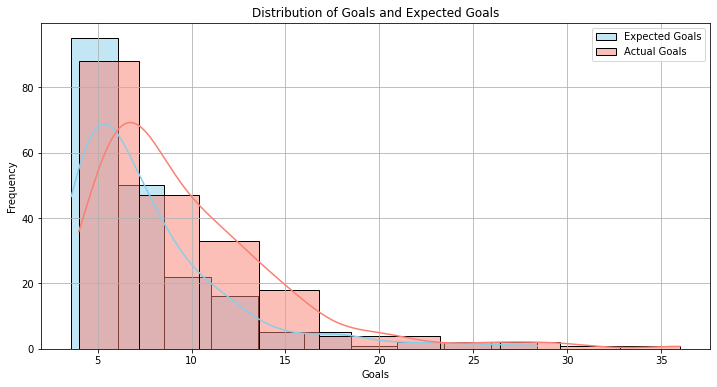

In [198]:
import seaborn as sns
import matplotlib.pyplot as plt

players = []
expected_goals = []
actual_goals = []

for row in result:
    players.append(row['player'])
    expected_goals.append(float(row['expectedGoals']))
    actual_goals.append(float(row['actualGoals']))

# Create a DataFrame from the data
import pandas as pd
data = pd.DataFrame({'Player': players, 'Expected Goals': expected_goals, 'Actual Goals': actual_goals})

plt.figure(figsize=(12, 6))
sns.histplot(data=data, x='Expected Goals', bins=10, color='skyblue', kde=True, label='Expected Goals')
sns.histplot(data=data, x='Actual Goals', bins=10, color='salmon', kde=True, label='Actual Goals')

plt.title('Distribution of Goals and Expected Goals')
plt.xlabel('Goals')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True)
plt.show()


PLOT THE DISTRIBUTION OF THE ERRORS

C:\Users\matte\AppData\Local\Temp\ipykernel_25100\4235472119.py:30: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  plt.show()


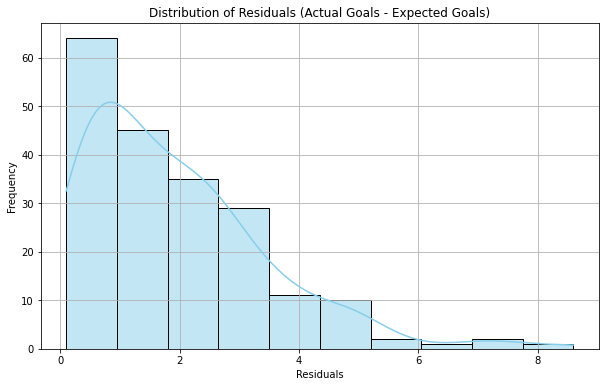

In [189]:
import seaborn as sns
import matplotlib.pyplot as plt

players = []
expected_goals = []
actual_goals = []

for row in result:
    players.append(row['player'])
    expected_goals.append(float(row['expectedGoals']))
    actual_goals.append(float(row['actualGoals']))

residuals = [actual - expected for actual, expected in zip(actual_goals, expected_goals)]

import pandas as pd
data = pd.DataFrame({'Player': players, 'Residuals': residuals})

plt.figure(figsize=(10, 6))
sns.histplot(data=data, x='Residuals', bins=10, kde=True, color='skyblue')

plt.title('Distribution of Residuals (Actual Goals - Expected Goals)')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


QUERY THAT RETRIEVES THE MOST DANGEROUS PLAYERS IN A SPECIFIC MATCH AND  RETRIEVES HOW THE MATCH ENDED  

In [397]:
query = """
prefix foaf: <http://xmlns.com/foaf/0.1/> 
prefix owl1: <http://www.w3.org/2002/07/owl/> 
prefix rdfs1: <http://www.w3.org/2000/01/rdf-schema/> 
prefix schema: <https://schema.org/> 
prefix sport: <https://sportschema.org/ontologies/main/> 
prefix xsd: <http://www.w3.org/2001/XMLSchema#> 

SELECT ?player ?playerName ?playerAge ?goals  ?assist ?goalsandassist ?expgoals ?expassist ?Carries ?Passes ?PassesReceived ?homegoals ?awaygoals ?hometeamShots ?awayteamShots ?Result
WHERE {
    
    {
        ?player a schema:athlete ;
            foaf:name ?playerName ;
            sport:playerAge ?playerAge ;
            sport:Team <https://example.com/team/Real_Madrid> ;
            sport:goalsScored ?goals ;
            sport:assist ?assist;
            sport:GoalsandAssist ?goalsandassist;
            sport:ExpectedGoals ?expgoals;
            sport:ExpectedAssist ?expassist;
            sport:ProgressiveCarries ?Carries ;
            sport:ProgressivePasses ?Passes ;
            sport:ProgressivePassesReceived ?PassesReceived .
    }
    UNION
    
    {
        ?player a schema:athlete ;
            foaf:name ?playerName ;
            sport:playerAge ?playerAge ;
            sport:Team <https://example.com/team/Barcelona> ;
            sport:goalsScored ?goals ;
            sport:assist ?assist;
            sport:GoalsandAssist ?goalsandassist;
            sport:ExpectedGoals ?expgoals;
            sport:ExpectedAssist ?expassist;
            sport:ProgressiveCarries ?Carries ;
            sport:ProgressivePasses ?Passes ;
            sport:ProgressivePassesReceived ?PassesReceived .
    }
    
    
    ?match a sport:Match ;
        sport:participatingTeams <https://example.com/team/Real_Madrid>, <https://example.com/team/Barcelona> ;
        sport:fullTimeHomeGoals ?homegoals ;
        sport:fullTimeAwayGoals ?awaygoals ;
        sport:homeTeamShots ?hometeamShots ;
        sport:awayTeamShots ?awayteamShots ;
        sport:fullTimeResult ?Result .
}
GROUP BY ?player ?playerName ?playerAge
ORDER BY DESC(?goalsandassist)
LIMIT 5
"""
query = prepareQuery(query)
result = g.query(query)

for row in result:
 
    # Print the values
    print(f"{row['player']} name {row['playerName']} has {row['playerAge']} years,scored {row['goals']} goal, succeded {row['assist']} assist, that makes in total {row['goalsandassist']} goals+assits, with {row['expgoals']} expected goals, {row['expassist']} expected assist. In addition,has done {row['Carries']} progr. carries, {row['Passes']} progr. passes, {row['PassesReceived']} progr. passes received, but the game ended in {row['homegoals']} home team goals, {row['awaygoals']} away team goals, {row['hometeamShots']} home team shots, {row['awayteamShots']}. THE FINAL RESULT IS {row['Result']} ")

https://example.com/player/Robert_Lewandowski name Robert Lewandowski has 33 years,scored 23 goal, succeded 7 assist, that makes in total 30 goals+assits, with 24.3 expected goals, 6.3 expected assist. In addition,has done 52 progr. carries, 100 progr. passes, 248 progr. passes received, but the game ended in 3 home team goals, 1 away team goals, 8 home team shots, 18. THE FINAL RESULT IS H 
https://example.com/player/Karim_Benzema name Karim Benzema has 34 years,scored 19 goal, succeded 3 assist, that makes in total 22 goals+assits, with 21.5 expected goals, 5.8 expected assist. In addition,has done 72 progr. carries, 138 progr. passes, 157 progr. passes received, but the game ended in 3 home team goals, 1 away team goals, 8 home team shots, 18. THE FINAL RESULT IS H 
https://example.com/player/Vinicius_Júnior name Vinicius Júnior has 22 years,scored 10 goal, succeded 9 assist, that makes in total 19 goals+assits, with 10.5 expected goals, 9.4 expected assist. In addition,has done 221

PLOT THE RESULTS

C:\Users\matte\AppData\Local\Temp\ipykernel_25100\3493790886.py:65: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  plt.show()


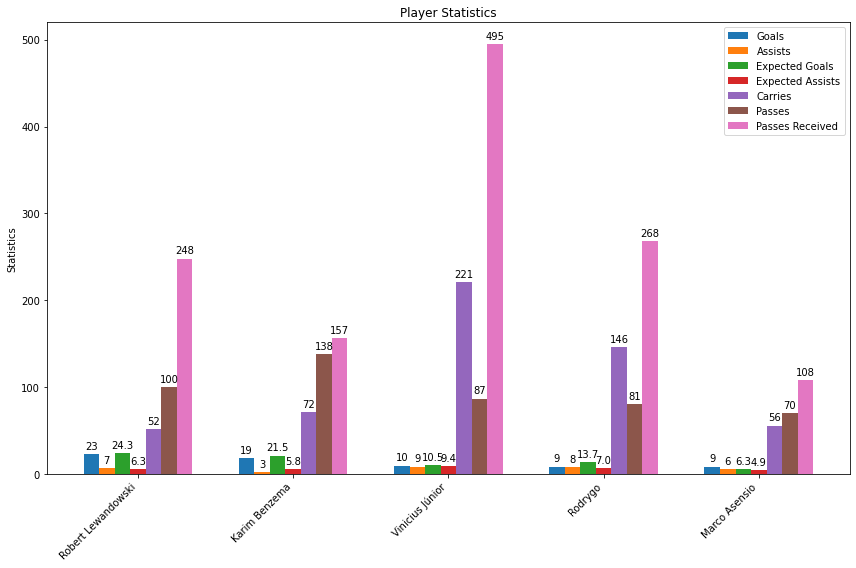

In [398]:
import matplotlib.pyplot as plt
import numpy as np

players = []
goals = []
assists = []
exp_goals = []
exp_assists = []
carries = []
passes = []
passes_received = []


for row in result:
    players.append(row['playerName'])
    goals.append(int(row['goals']))
    assists.append(int(row['assist']))
    exp_goals.append(float(row['expgoals']))
    exp_assists.append(float(row['expassist']))
    carries.append(int(row['Carries']))
    passes.append(int(row['Passes']))
    passes_received.append(int(row['PassesReceived']))


fig, ax = plt.subplots(figsize=(12, 8))

index = np.arange(len(players))
bar_width = 0.1


bar1 = ax.bar(index - 3*bar_width, goals, bar_width, label='Goals')
bar2 = ax.bar(index - 2*bar_width, assists, bar_width, label='Assists')
bar3 = ax.bar(index - bar_width, exp_goals, bar_width, label='Expected Goals')
bar4 = ax.bar(index, exp_assists, bar_width, label='Expected Assists')
bar5 = ax.bar(index + bar_width, carries, bar_width, label='Carries')
bar6 = ax.bar(index + 2*bar_width, passes, bar_width, label='Passes')
bar7 = ax.bar(index + 3*bar_width, passes_received, bar_width, label='Passes Received')

# Annotate each bar with its value
def annotate_bars(bar):
    for b in bar:
        height = b.get_height()
        ax.annotate('{}'.format(height),
                    xy=(b.get_x() + b.get_width() / 2, height),
                    xytext=(0, 3),  
                    textcoords="offset points",
                    ha='center', va='bottom')

annotate_bars(bar1)
annotate_bars(bar2)
annotate_bars(bar3)
annotate_bars(bar4)
annotate_bars(bar5)
annotate_bars(bar6)
annotate_bars(bar7)

ax.set_ylabel('Statistics')
ax.set_title('Player Statistics')
ax.set_xticks(index)
ax.set_xticklabels(players, rotation=45, ha='right')
ax.legend()

plt.tight_layout()
plt.show()


EXTRACT THE SAME VALUES, BUT FOR EVERY PLAYER OF EACH TEAM

In [346]:

top_players = {}

for row in result:
    
    team_uri = row['team']
    total_goals = int(row['totalGoals'])
    player = row['player']
    player_name = row['playerName']
    player_age = row['playerAge']
    goals_and_assist = int(row['goalsAndAssist'])
    percentage = (goals_and_assist / total_goals) * 100
    
    
    team_name = extract_team_name(team_uri)
    
    # Check if the team already has top players
    if team_name not in top_players:
        top_players[team_name] = [{
            'team_uri': team_uri,
            'player': player,
            'playerName': player_name,
            'playerAge': player_age,
            'goalsAndAssist': goals_and_assist,
            'percentage': percentage
        }]
    else:
        top_players[team_name].append({
            'team_uri': team_uri,
            'player': player,
            'playerName': player_name,
            'playerAge': player_age,
            'goalsAndAssist': goals_and_assist,
            'percentage': percentage
        })


for team, players_info in top_players.items():
    for player_info in players_info:
        print(f"Team URI: {player_info['team_uri']}")
        print(f"Team Name: {team}")
        print(f"Player: {player_info['player']}")
        print(f"Player Name: {player_info['playerName']}")
        print(f"Player Age: {player_info['playerAge']}")
        print(f"Goals and Assist: {player_info['goalsAndAssist']}")
        print(f"Percentage of the team's total goals: {player_info['percentage']:.2f}%")
        print("---------------------------------------------")


Team URI: https://example.com/team/Bayern_Munich
Team Name: Bayern Munich
Player: https://example.com/player/Jamal_Musiala
Player Name: Jamal Musiala
Player Age: 19
Goals and Assist: 22
Percentage of the team's total goals: 23.91%
---------------------------------------------
Team URI: https://example.com/team/Bayern_Munich
Team Name: Bayern Munich
Player: https://example.com/player/Serge_Gnabry
Player Name: Serge Gnabry
Player Age: 27
Goals and Assist: 19
Percentage of the team's total goals: 20.65%
---------------------------------------------
Team URI: https://example.com/team/Bayern_Munich
Team Name: Bayern Munich
Player: https://example.com/player/Thomas_Müller
Player Name: Thomas Müller
Player Age: 32
Goals and Assist: 15
Percentage of the team's total goals: 16.30%
---------------------------------------------
Team URI: https://example.com/team/Bayern_Munich
Team Name: Bayern Munich
Player: https://example.com/player/Leroy_Sané
Player Name: Leroy Sané
Player Age: 26
Goals and As

PLOT IN ORDER TO SHOW THE COMPARISON OF THE PLAYERS IN A SPECIFIC TEAM 

C:\Users\matte\AppData\Local\Temp\ipykernel_25100\2317326357.py:27: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  plt.show()


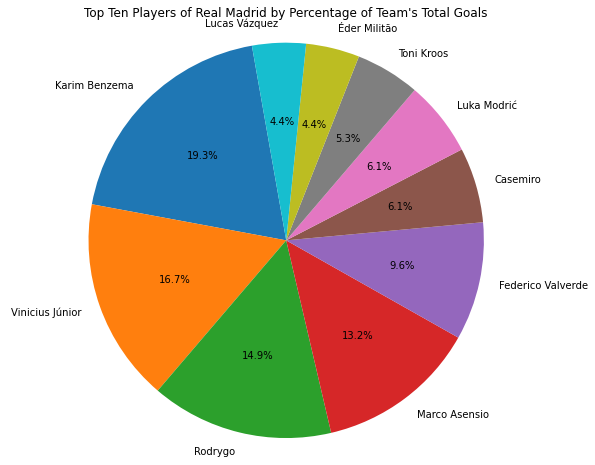

In [377]:
import matplotlib.pyplot as plt


team_players = [info for info in top_players.values() if extract_team_name(info[0]['team_uri']) == 'Real Madrid' and info[0]['percentage'] > 1]


sorted_players = sorted([info for team_info in team_players for info in team_info], key=lambda x: x['percentage'], reverse=True)


top_eleven_players = sorted_players[:10]


player_names = [info['playerName'] for info in top_eleven_players]
percentages = [info['percentage'] for info in top_eleven_players]


plt.figure(figsize=(10, 8))


def actual_autopct(pct):
    return '{:.1f}%'.format(pct)

pie = plt.pie(percentages, labels=player_names, autopct=actual_autopct, startangle=100)  

plt.title('Top Ten Players of Real Madrid by Percentage of Team\'s Total Goals')
plt.axis('equal')  
plt.show()


QUERY TO RETRIEVE PLAYERS THAT CONTRIBUTED THE MOST IN SCORING GOALS AND ASSISTS FOR THE EVERY TEAMS 

In [424]:
query = """
prefix foaf: <http://xmlns.com/foaf/0.1/>
prefix schema: <https://schema.org/>
prefix sport: <https://sportschema.org/ontologies/main/>

SELECT ?team ?totalGoals ?player ?playerName ?playerAge ?goals ?assist ?goalsAndAssist 
WHERE {
    {
        SELECT ?team (SUM(?homeGoals) + SUM(?awayGoals) AS ?totalGoals)
        WHERE {
            {
                ?match a sport:Match ;
                       sport:homeTeam ?team ;
                       sport:fullTimeHomeGoals ?homeGoals .
            }
            UNION
            {
                ?match a sport:Match ;
                       sport:awayTeam ?team ;
                       sport:fullTimeAwayGoals ?awayGoals .
            }
        }
        GROUP BY ?team
    }
    ?player a schema:athlete ;
            foaf:name ?playerName ;
            sport:playerAge ?playerAge ;
            sport:Team ?team ;
            sport:goalsScored ?goals ;
            sport:assist ?assist ;
            sport:GoalsandAssist ?goalsAndAssist .
}
GROUP BY ?team ?player
ORDER BY DESC(?totalGoals+?goalsAndAssist)
"""

query = prepareQuery(query)
result = g.query(query)


top_players = {}

for row in result:
    
    team = row['team']
    total_goals = int(row['totalGoals'])
    player = row['player']
    player_name = row['playerName']
    player_age = row['playerAge']
    goals_and_assist = int(row['goalsAndAssist'])
    percentage = (goals_and_assist / total_goals) * 100
    
    
    if team not in top_players:
        top_players[team] = {
            'player': player,
            'playerName': player_name,
            'playerAge': player_age,
            'goalsAndAssist': goals_and_assist,
            'percentage': percentage
        }
    else:
        
        if goals_and_assist > top_players[team]['goalsAndAssist']:
            top_players[team] = {
                'player': player,
                'playerName': player_name,
                'playerAge': player_age,
                'goalsAndAssist': goals_and_assist,
                'percentage': percentage
            }


for team, player_info in top_players.items():
    print(f"Team: {team}")
    print(f"Player: {player_info['player']}")
    print(f"Player Name: {player_info['playerName']}")
    print(f"Player Age: {player_info['playerAge']}")
    print(f"Goals and Assist: {player_info['goalsAndAssist']}")
    print(f"Percentage of the team's total goals: {player_info['percentage']:.2f}%")
    print("---------------------------------------------")


Team: https://example.com/team/Bayern_Munich
Player: https://example.com/player/Jamal_Musiala
Player Name: Jamal Musiala
Player Age: 19
Goals and Assist: 22
Percentage of the team's total goals: 23.91%
---------------------------------------------
Team: https://example.com/team/Arsenal
Player: https://example.com/player/Bukayo_Saka
Player Name: Bukayo Saka
Player Age: 20
Goals and Assist: 25
Percentage of the team's total goals: 28.41%
---------------------------------------------
Team: https://example.com/team/Inter
Player: https://example.com/player/Lautaro_Martínez
Player Name: Lautaro Martínez
Player Age: 24
Goals and Assist: 27
Percentage of the team's total goals: 32.14%
---------------------------------------------
Team: https://example.com/team/Liverpool
Player: https://example.com/player/Mohamed_Salah
Player Name: Mohamed Salah
Player Age: 30
Goals and Assist: 31
Percentage of the team's total goals: 41.33%
---------------------------------------------
Team: https://example.co

I CAN SEE THE MINIMAL GOALS AND ASSISTS THAT I WOULD EXPECT IF I WANT TO BUY A PLAYER FROM THE ONES THAT CONTRIBUTED THE MOST IN THEIR TEAM 

In [425]:
import numpy as np


goals_and_assists = [team_info['goalsAndAssist'] for team_info in top_players.values()]


goals_and_assists_mean = np.mean(goals_and_assists)
goals_and_assists_median = np.median(goals_and_assists)
goals_and_assists_std = np.std(goals_and_assists)
goals_and_assists_q1 = np.percentile(goals_and_assists, 25)
goals_and_assists_q3 = np.percentile(goals_and_assists, 75)

#Minimal values for goalsAndAssist
minimal_goals_and_assists = goals_and_assists_q1  
average_goals_and_assists = goals_and_assists_mean  

print(f"Minimal Goals and Assists: {minimal_goals_and_assists}")
print(f"Average Goals and Assists: {average_goals_and_assists}")

Minimal Goals and Assists: 12.0
Average Goals and Assists: 16.73972602739726


SHOW THE BOXPLOT

C:\Users\matte\AppData\Local\Temp\ipykernel_25100\4002491839.py:37: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  plt.show()


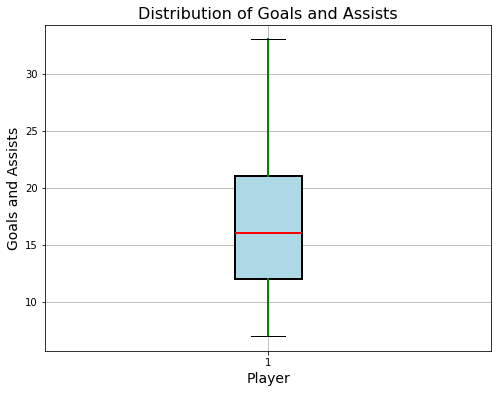

In [426]:
import matplotlib.pyplot as plt


plt.figure(figsize=(8, 6))
box = plt.boxplot(goals_and_assists, vert=True, patch_artist=True)


box_colors = ['lightblue']  
median_color = 'red'        
whisker_color = 'green'     
mean_marker_color = 'blue'  
outlier_marker_color = 'orange'  


for patch in box['boxes']:
    patch.set(color='black', linewidth=2)
    patch.set(facecolor=box_colors[0])

for whisker in box['whiskers']:
    whisker.set(color=whisker_color, linewidth=2)

for median in box['medians']:
    median.set(color=median_color, linewidth=2)

for mean in box['means']:
    mean.set(marker='o', color=mean_marker_color, markersize=10)

for outlier in box['fliers']:
    outlier.set(marker='o', color=outlier_marker_color, markersize=8)


plt.title('Distribution of Goals and Assists', fontsize=16)
plt.xlabel('Player', fontsize=14)
plt.ylabel('Goals and Assists', fontsize=14)
plt.grid(True)

plt.show()


SEARCH FOR  FOR EMERGING TALENTS; PRINTING THEM IN A DATAFRAME

In [382]:
#!pip install tabulate

In [427]:
import pandas as pd
from tabulate import tabulate


age_threshold = 23  
min_goals_assists = 12  


emerging_talents = []


for row in result:
    
    team = row['team']
    player_name = row['playerName']
    player_age = int(row['playerAge'])
    goals_and_assist = int(row['goalsAndAssist'])
    
    
    if player_age < age_threshold and goals_and_assist >= min_goals_assists:
        
        emerging_talents.append({
            'Player': player_name,
            'Team': team,
            'Player Age': player_age,
            'Goals and Assist': goals_and_assist
        })


df_emerging_talents = pd.DataFrame(emerging_talents)


df_emerging_talents = df_emerging_talents.sort_values(by='Goals and Assist', ascending=False).reset_index(drop=True)


df_emerging_talents.index += 1


print(tabulate(df_emerging_talents, headers='keys', tablefmt='grid'))


+----+-----------------------+-----------------------------------------+--------------+--------------------+
|    | Player                | Team                                    |   Player Age |   Goals and Assist |
+====+=======================+=========================================+==============+====================+
|  1 | Jonathan David        | https://example.com/team/Lille          |           22 |                 28 |
+----+-----------------------+-----------------------------------------+--------------+--------------------+
|  2 | Loïs Openda           | https://example.com/team/Lens           |           22 |                 25 |
+----+-----------------------+-----------------------------------------+--------------+--------------------+
|  3 | Bukayo Saka           | https://example.com/team/Arsenal        |           20 |                 25 |
+----+-----------------------+-----------------------------------------+--------------+--------------------+
|  4 | Elye Wahi   